<a href="https://colab.research.google.com/github/charu6969/charu6969/blob/main/London_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/london_houses.csv')
df.sample(5)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
424,167 Park Lane,Camden,5,2,239,2,Yes,No,2,Semi-Detached,Gas Heating,No Balcony,Classic,Sea,Granite,Old,2485600
828,161 Piccadilly Circus,Camden,3,3,70,27,Yes,No,3,Apartment,Gas Heating,Low-level Balcony,Classic,Sea,Laminate Flooring,Renovated,606666
532,49 Bond Street,Notting Hill,4,2,121,17,No,No,1,Apartment,Electric Heating,High-level Balcony,Minimalist,Sea,Marble,Renovated,1290666
942,155 Oxford Street,Camden,4,3,195,49,No,Yes,2,Apartment,Central Heating,Low-level Balcony,Classic,Garden,Wood,New,1689999
655,84 Regent Street,Marylebone,3,1,80,79,No,Yes,2,Detached House,Gas Heating,No Balcony,Classic,City,Granite,New,1200000


In [4]:
df['Address'] = df['Address'].str.replace(r'^\d+\s', '', regex=True)
df['Address']

,Address
0,Regent Street
1,Oxford Street
2,Regent Street
3,Piccadilly Circus
4,Fleet Street
...,...
995,Camden High Street
996,Park Lane
997,Camden High Street
998,Park Lane


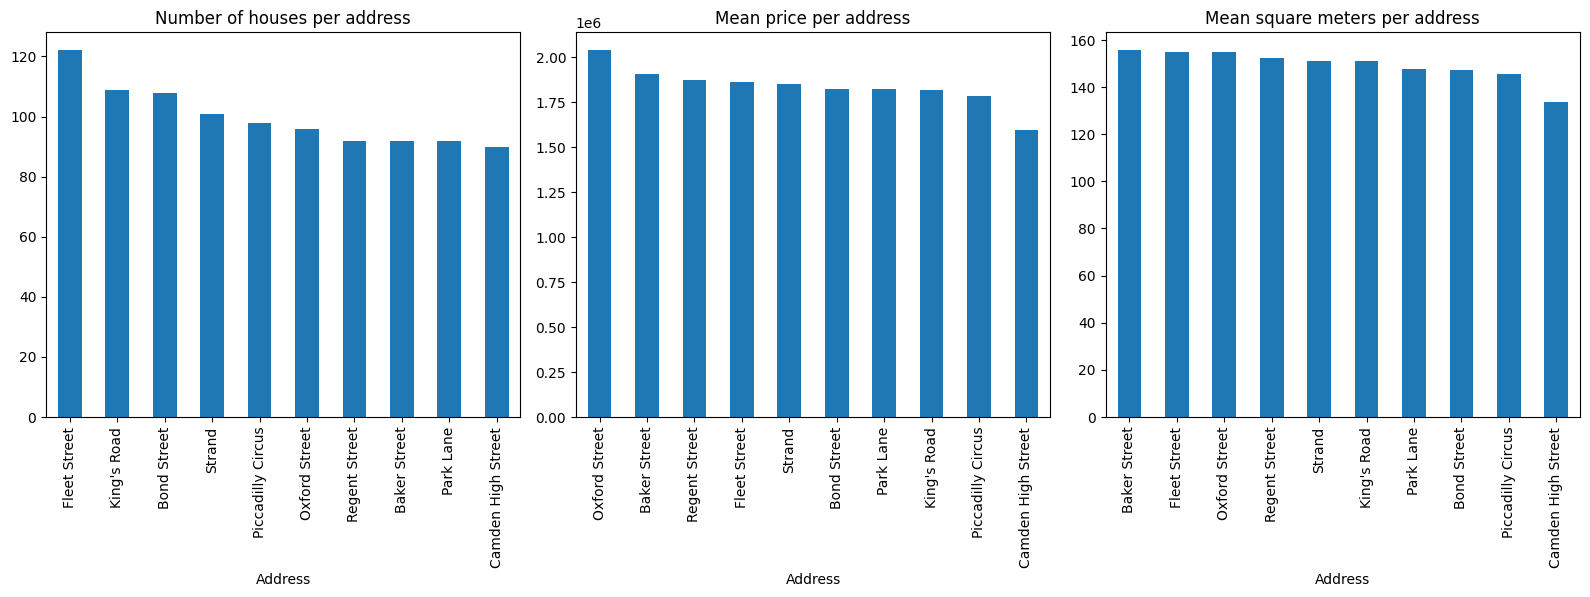

In [5]:
f, ax = plt.subplots(1,3, figsize=(16, 6))


df['Address'].value_counts().plot(kind='bar', ax = ax[0])

df_mean_price_address = df['Price (£)'].groupby(df['Address']).mean().sort_values(ascending=False)
df_mean_price_address.plot(kind='bar', ax=ax[1])

df_mean_square_address = df['Square Meters'].groupby(df['Address']).mean().sort_values(ascending=False)
df_mean_square_address.plot(kind='bar', ax=ax[2])

plt.tight_layout()
ax[0].set_title('Number of houses per address')
ax[1].set_title('Mean price per address')
ax[2].set_title('Mean square meters per address')
plt.show()

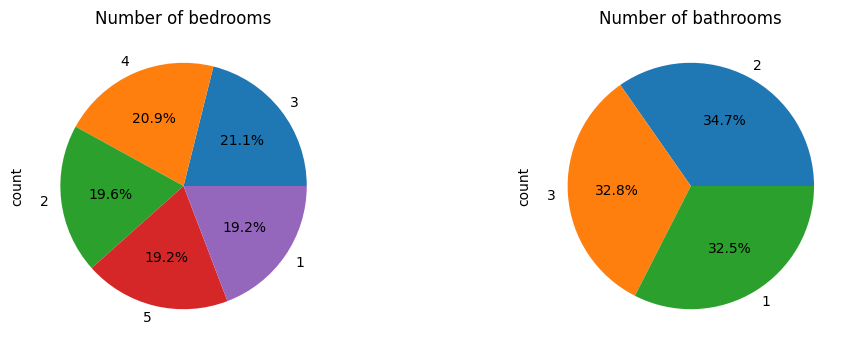

In [6]:
f, ax = plt.subplots(1,2, figsize=(12, 4))
df['Bedrooms'].value_counts().plot(kind='pie', ax=ax[0], autopct='%1.1f%%')
df['Bathrooms'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
ax[0].set_title('Number of bedrooms')
ax[1].set_title('Number of bathrooms')
plt.show()

In [7]:
filter_df = df['Price (£)'].groupby(df['Bedrooms']).mean().sort_values(ascending=False)
filter_df

,Price (£)
Bedrooms,
2,1.942588e+06
4,1.866624e+06
3,1.828336e+06
1,1.789300e+06
5,1.774016e+06


In [8]:
filter_df = df['Price (£)'].groupby(df['Bathrooms']).mean().sort_values(ascending=False)
filter_df

,Price (£)
Bathrooms,
1,1.889807e+06
3,1.818701e+06
2,1.815810e+06


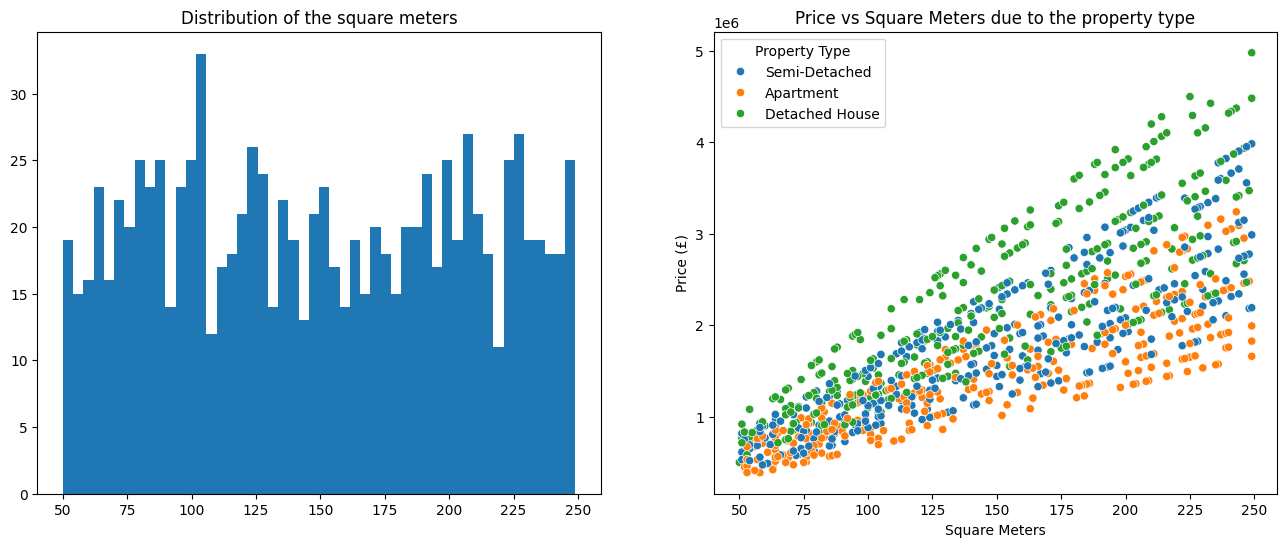

In [9]:
f, ax = plt.subplots(1,2, figsize=(16, 6))

ax[0].hist(df['Square Meters'], bins=50)

sns.scatterplot(x='Square Meters', y='Price (£)', hue='Property Type', data=df, ax=ax[1])

ax[0].set_title('Distribution of the square meters')
ax[1].set_title('Price vs Square Meters due to the property type')
plt.show()

In [10]:
df['price_per_sqm'] = df['Price (£)'] / df['Square Meters']

# see which neighborhood has the highest price per square meter
df[df['price_per_sqm'] == df['price_per_sqm'].max()] # mainly chealsea

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),price_per_sqm
77,Camden High Street,Chelsea,4,3,128,72,No,No,1,Detached House,Underfloor Heating,High-level Balcony,Industrial,Park,Granite,Renovated,2560000,20000.0
83,Piccadilly Circus,Chelsea,3,2,94,47,Yes,Yes,1,Detached House,Central Heating,No Balcony,Minimalist,Garden,Granite,Renovated,1880000,20000.0
86,Oxford Street,Chelsea,5,2,249,3,Yes,No,2,Detached House,Central Heating,High-level Balcony,Minimalist,Sea,Wood,Renovated,4980000,20000.0
102,Camden High Street,Chelsea,1,1,153,54,No,Yes,1,Detached House,Central Heating,High-level Balcony,Modern,Park,Granite,Old,3060000,20000.0
113,Park Lane,Chelsea,3,1,188,52,No,No,3,Detached House,Underfloor Heating,No Balcony,Minimalist,Sea,Wood,Old,3760000,20000.0
238,Park Lane,Chelsea,1,2,163,85,No,Yes,1,Detached House,Electric Heating,Low-level Balcony,Modern,Garden,Wood,New,3260000,20000.0
291,Fleet Street,Chelsea,2,1,196,96,Yes,No,2,Detached House,Underfloor Heating,Low-level Balcony,Modern,Park,Wood,Renovated,3920000,20000.0
306,Strand,Chelsea,4,1,109,30,Yes,Yes,1,Detached House,Electric Heating,No Balcony,Minimalist,Street,Laminate Flooring,New,2180000,20000.0
307,Baker Street,Chelsea,3,3,88,4,Yes,Yes,2,Detached House,Underfloor Heating,Low-level Balcony,Classic,Sea,Laminate Flooring,Old,1760000,20000.0
324,Strand,Chelsea,3,1,114,69,Yes,Yes,2,Detached House,Gas Heating,No Balcony,Industrial,Park,Marble,Renovated,2280000,20000.0


In [11]:
print(df[df['Garden'] == 'Yes']['Price (£)'].mean())
print(df[df['Garden'] == 'No']['Price (£)'].mean())
print(df['Garden'].value_counts())

print(df[df['Garage'] == 'Yes']['Price (£)'].mean())
print(df[df['Garage'] == 'No']['Price (£)'].mean())
print(df['Garage'].value_counts())

1833433.28125
1848543.9303278688
Garden
Yes    512
No     488
Name: count, dtype: int64
1881849.1876247504
1799600.871743487
Garage
Yes    501
No     499
Name: count, dtype: int64


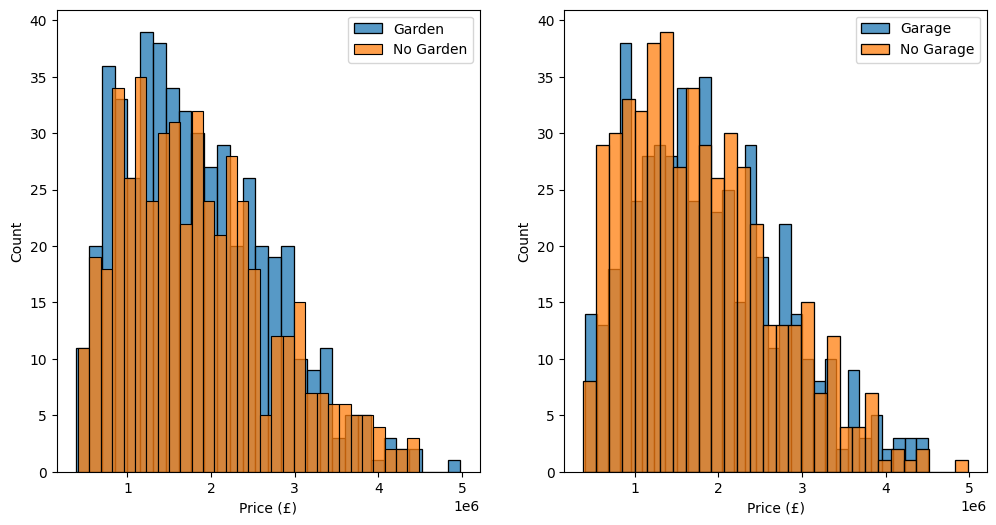

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df[df['Garden'] == 'Yes']['Price (£)'], bins=30, ax=ax[0], label='Garden')
sns.histplot(df[df['Garden'] == 'No']['Price (£)'], bins=30, ax=ax[0], label='No Garden')
ax[0].legend()

sns.histplot(df[df['Garage'] == 'Yes']['Price (£)'], bins=30, ax=ax[1], label='Garage')
sns.histplot(df[df['Garage'] == 'No']['Price (£)'], bins=30, ax=ax[1], label='No Garage')
ax[1].legend()

plt.show()

In [13]:
df[(df['Garden'] == 'No') & (df['Price (£)'] > 4e6)].sort_values(by='Price (£)', ascending=False)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),price_per_sqm
497,Strand,Westminster,2,3,249,14,No,No,2,Detached House,Electric Heating,High-level Balcony,Industrial,City,Marble,New,4482000,18000.0
602,Oxford Street,Kensington,5,2,233,72,No,Yes,2,Detached House,Electric Heating,No Balcony,Minimalist,Sea,Marble,Old,4427000,19000.0
715,King's Road,Westminster,2,3,243,90,No,Yes,3,Detached House,Gas Heating,High-level Balcony,Industrial,Street,Wood,Old,4374000,18000.0
980,Park Lane,Westminster,5,3,240,71,No,No,3,Detached House,Central Heating,High-level Balcony,Minimalist,Sea,Wood,New,4320000,18000.0
528,Fleet Street,Kensington,1,3,226,61,No,Yes,1,Detached House,Electric Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Renovated,4294000,19000.0
777,Fleet Street,Kensington,2,1,216,79,No,Yes,1,Detached House,Central Heating,High-level Balcony,Minimalist,Garden,Marble,New,4104000,19000.0
822,Baker Street,Westminster,1,1,228,67,No,Yes,2,Detached House,Electric Heating,High-level Balcony,Modern,Street,Laminate Flooring,Renovated,4104000,18000.0
328,Bond Street,Kensington,4,3,211,40,No,Yes,2,Detached House,Underfloor Heating,No Balcony,Industrial,City,Laminate Flooring,Renovated,4009000,19000.0


In [14]:
df['Price (£)'].groupby(df['Floors']).mean().sort_values(ascending=False)


,Price (£)
Floors,
2,1.896289e+06
3,1.830673e+06
1,1.797951e+06


In [15]:
df['Price (£)'].groupby(df['Building Status']).mean().sort_values(ascending=False)


,Price (£)
Building Status,
Renovated,1.903353e+06
New,1.892813e+06
Old,1.722782e+06


Text(0.5, 1.0, 'Price distribution')

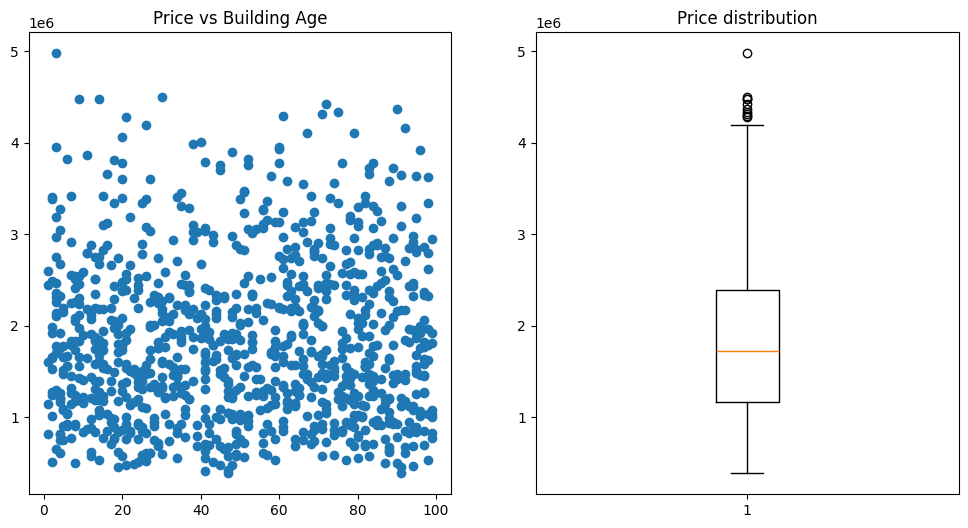

In [16]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(df['Building Age'], df['Price (£)'])
ax[1].boxplot(df['Price (£)'])
ax[0].set_title('Price vs Building Age')
ax[1].set_title('Price distribution')

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
def plot_pred_real(y_test, y_pred, sample):
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('R2: {:.3f}'.format(r2_score(y_test, y_pred)))
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values[:sample], 'o', label='Real')
    plt.plot(y_pred[:sample], 'x', label='Predicted')
    plt.legend()
    plt.show()

In [18]:
from sklearn.model_selection import train_test_split

df.reset_index(drop=True, inplace=True)
cols = ['Neighborhood', 'Square Meters', 'Property Type', 'Interior Style']
train = df[cols]
test  = df['Price (£)']
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)